# 브랜드별 top 랭킹안에 걸려있는 상품 카테고리 1위 제품의 좋아요 수 

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # 그래프 출력
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns

# 경고 메시지 처리
import warnings

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

# 경고메시지 출력 생략
warnings.filterwarnings('ignore')

# 런타임을 다시 실행시켜야 한글폰트가 적용됩니다

NanumGothic Eco


In [ ]:
musinsa = pd.read_csv('/content/musinsa_rank_data_220408.csv', index_col=0)

df = pd.DataFrame(musinsa)
df


In [4]:
brand_cnt = df['브랜드명'].value_counts()

brand_cnt[brand_cnt > 5].sum()

671

In [5]:
drop_df = pd.DataFrame(df['브랜드명'].value_counts())
drop_df = drop_df.reset_index()

In [ ]:
drop_df.columns = ['브랜드명', 'count']
drop_df

In [ ]:
drop_under_5 = []

for i in range(len(drop_df['브랜드명'])):
    if drop_df['count'][i] > 5:
        drop_under_5.append(drop_df['브랜드명'][i])

drop_under_5

In [23]:
use_brand = df[df['브랜드명'].isin(drop_under_5)].reset_index()

In [24]:
sort_brand = use_brand.sort_values('브랜드명').reset_index()

# sort_brand_df = pd.DataFrame(sort_brand).reset_index()
# sort_brand_df

In [25]:
max_like = sort_brand[['브랜드명','순위','Countlike']].groupby('브랜드명').max()
max_like = max_like.sort_values('Countlike', ascending=False).reset_index()

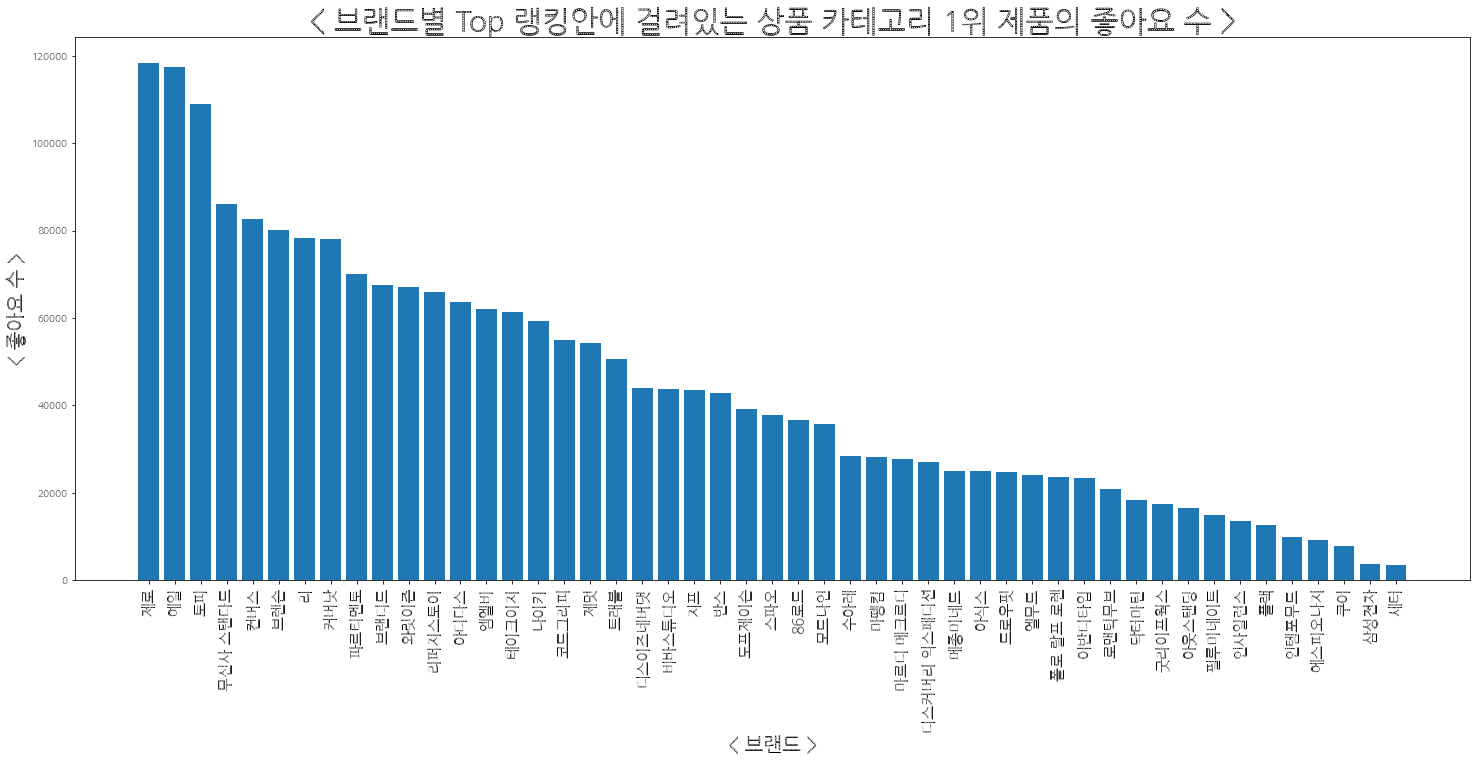

In [26]:
plt.bar(max_like['브랜드명'],max_like['Countlike'])
plt.title('< 브랜드별 Top 랭킹안에 걸려있는 상품 카테고리 1위 제품의 좋아요 수 >',fontsize = 30)
plt.xlabel('< 브랜드 >',fontsize = 20)
plt.ylabel('< 좋아요 수 >',fontsize = 20)
# plt.legend('')
plt.gcf().set_size_inches(25,10)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

# 할인률이 제일 높은 브랜드와 할인률에 따른 실질 구매 전환률 

In [52]:
sale_df = use_brand[['순위','브랜드명','할인전가격','할인후가격','pageview','purchase']]
sale_df.dtypes

순위           int64
브랜드명        object
할인전가격       object
할인후가격       object
pageview     int64
purchase     int64
dtype: object

In [87]:
# not sale >>> 0 으로 변경
new_list = []

for i in range(len(use_brand['할인후가격'])):
  if use_brand['할인후가격'][i] != 'not sale':
      new_list.append(use_brand['할인후가격'][i])
  else:
    new_list.append('0')



In [ ]:
new_list_df = pd.DataFrame(new_list)
new_list_df.columns=['할인후가격']

# 할인후가격 
# '원' 없애기 [ replace > regex = True, inplace = True] / regex=True : 부분일치의 경우, 해당 문자가 포함되어 있으면 문자가 대체 ]

new_list_df.replace('원','',regex = True, inplace = True)
af1_df = new_list_df
af1_df.replace(',','',regex = True, inplace = True)
af1_df

In [ ]:
# 할인전가격
bf1 = use_brand['할인전가격']
bf1

bf1_df = pd.DataFrame(bf1)
bf1_df.replace(',','',regex = True, inplace = True)
af1_df

In [ ]:
# ((할인전가격 - 할인후가격) / 할인전가격 )*100 = 할인률(%)

bf = pd.Series(use_brand['할인전가격'])
af = pd.Series(new_list_df['할인후가격'])

bf_df = pd.DataFrame(bf1_df).astype(int)
af_df = pd.DataFrame(af1_df).astype(int)

# bf_df
# af_df

df.insert('할인률')

# sale_rate = ((bf_df - af_df) / bf_df)*100
# sale_rate